In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("DS2_C5_S3_HR_Data_Practice.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
df.shape

(14999, 10)

In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

# Task 1: Data Exploration and Visulization.

# 1.Visualize the impact of salary on employee retention.

<Figure size 1000x400 with 0 Axes>

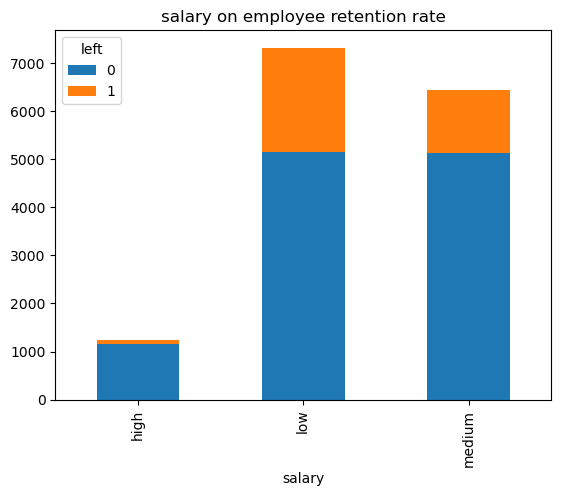

In [6]:
plt.figure(figsize=(10,4))
pd.crosstab(df['salary'],df['left']).plot(kind='bar',stacked=True)
plt.title('salary on employee retention rate');

#conclusion:-Majority of employees having the low salary.

# 2.Find the Department-wise employee retention rate.

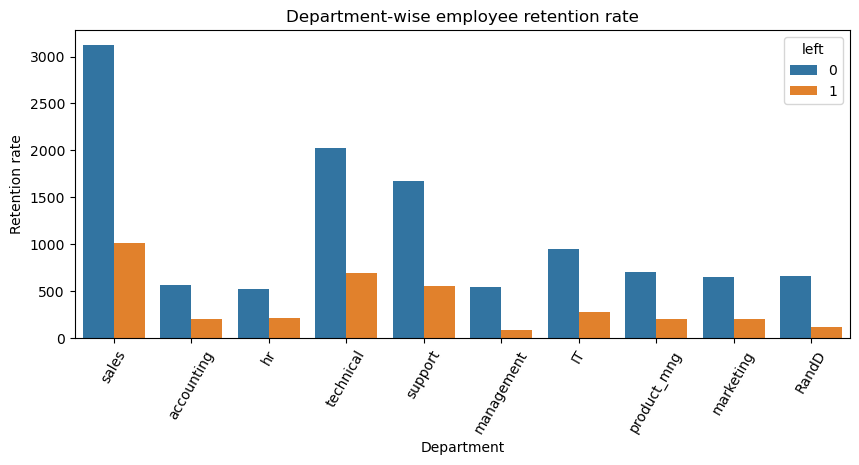

In [7]:
plt.figure(figsize=(10,4))
sb.countplot(data=df,x=df['Department'],hue=df['left'])
plt.title('Department-wise employee retention rate')
plt.xlabel('Department')
plt.ylabel('Retention rate')
plt.xticks(rotation=60);

Conclusion:-Sales Department have high attrition rate and existing customers as compare to other Deaprtments.

# Task 2: Data preprocessing.

# 1.Access the missing value.

In [8]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

# 2.Detect corrleation in dataset.

In [9]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


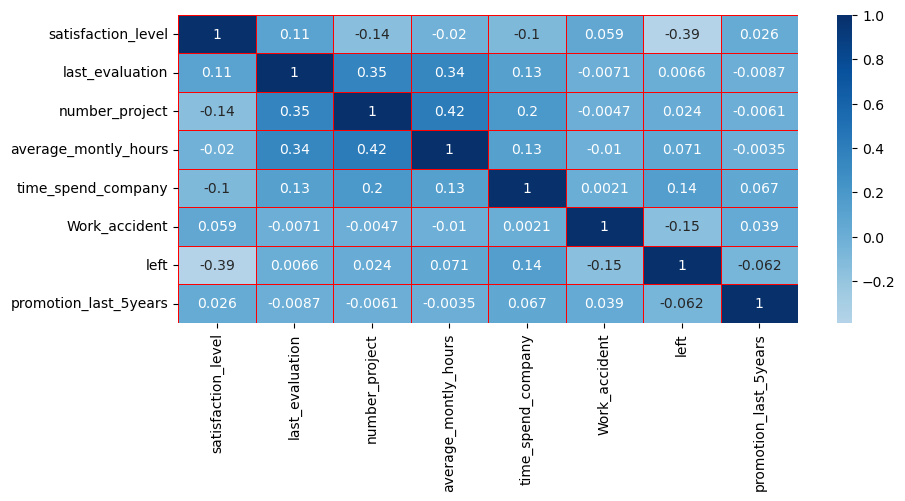

In [15]:
plt.figure(figsize=(10,4))
sb.heatmap(df.corr(),annot=True,linecolor='r',linewidth=.6,cmap='Blues',center=0);

# 3.Data preprocessing: Salary and department have all text data. convert them to numbers.

In [11]:
from sklearn.preprocessing import LabelEncoder
p=LabelEncoder()

In [27]:
df['Department']=p.fit_transform(df['Department'])
df['salary']=p.fit_transform(df['salary'])

# 4.Split the data into train and test sets.

In [28]:
x=df.drop(columns='left',axis=1)
y=df['left']

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=100)

# Which parameter have to be excluded in our analysis becauses they corrleate with the 'left' variable.

#conclusion:- Satisification_level have to be excluded in our analysis beacauses they corrleate with the 'left' variable.

# Task 3: Modelling-Naive Bayes

# 1.Naive Bayes cassification: Train the model and predict the outcomes of test data.

In [30]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [31]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

# 2.Calculate the accuracy of the training data.

In [32]:
from sklearn.metrics import accuracy_score
model.score(x_train,y_train)

0.7953138394132775

# 3.Calculate the accuracy of the test data.

In [33]:
from sklearn.metrics import accuracy_score
print('accuracy_score',accuracy_score(y_test,y_pred))

accuracy_score 0.8022222222222222


# Which factor seems to be the most importance one when people are leaving company?

In [34]:
from sklearn.inspection import permutation_importance
q=permutation_importance(model,x_test,y_test)
q.importances_mean
q1=pd.DataFrame([q.importances_mean],columns=['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years''Department','salary'])
q1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5yearsDepartment,salary
0,0.060667,0.003778,0.040933,0.0072,0.0168,0.021511,0.001956,0.002933,0.002933


# Task 4: Modelling -Decision Tree.

# 1.Decision Tree Classification: Train the model and predict the outcomes for test data.

In [35]:
X=df.drop(columns='left',axis=1)
Y=df['left']

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3,random_state=100)

In [57]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier(max_depth=3)
model1.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [58]:
y_pred1=model1.predict(X_test)
y_pred1

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

# 2.Calculate the accuracy of the trainng dataset.

In [59]:
from sklearn.metrics import accuracy_score
model1.score(X_train,Y_train)

0.9525669111343937

# 3.Calculate the accuracy of the test dataset.

In [60]:
from sklearn.metrics import accuracy_score
print('accuracy_score',accuracy_score(Y_test,y_pred1))

accuracy_score 0.9537777777777777


# Use a decision tree to classify if a peron is going a leave the company.

In [61]:
X_train.iloc[5640,:6]

satisfaction_level        0.91
last_evaluation           0.64
number_project            3.00
average_montly_hours    241.00
time_spend_company       10.00
Work_accident             0.00
Name: 11294, dtype: float64

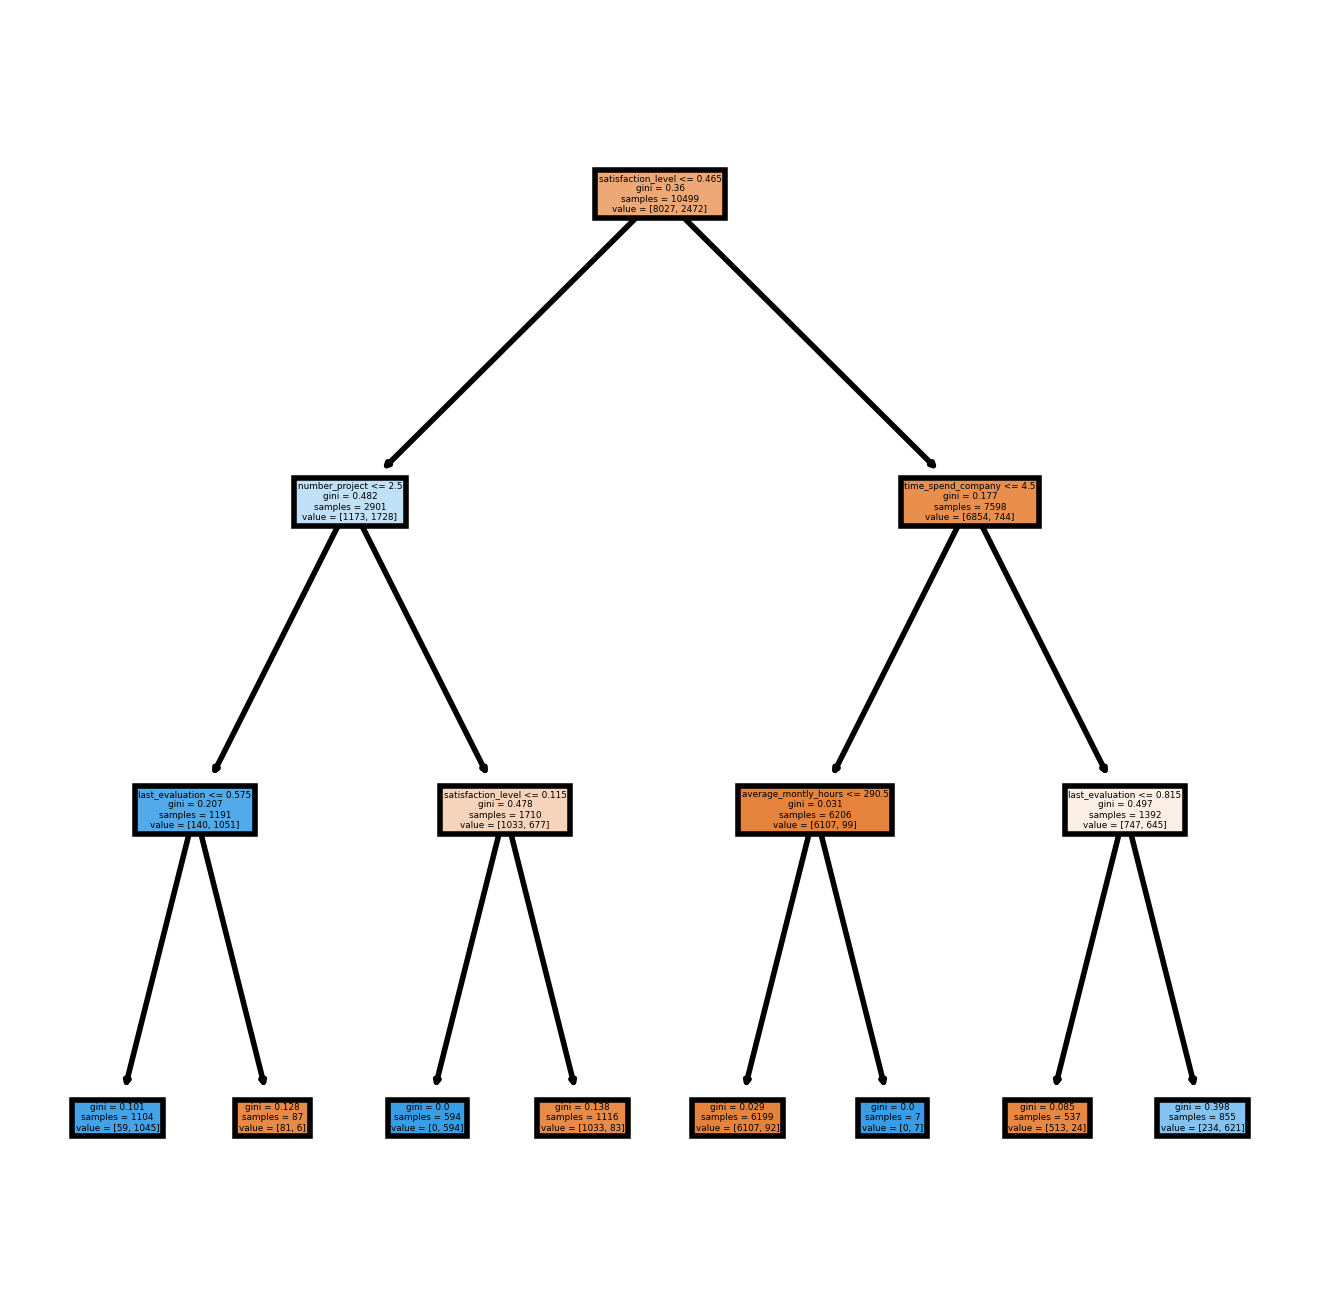

In [62]:
from sklearn import tree
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=400)
tree.plot_tree(model1,feature_names=df.columns,filled=True)
fig.savefig('HR_tree.png')

# Task5: Evaluation-Confusion matrix and ROC and AUC.

# 1.Confusion matrix: Calaulate Accuracy,Recall,F1-score and Precision.

In [42]:
#Naive_Bayes
from sklearn.metrics import classification_report,accuracy_score,recall_score,f1_score,precision_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      3401
           1       0.57      0.74      0.65      1099

    accuracy                           0.80      4500
   macro avg       0.74      0.78      0.75      4500
weighted avg       0.83      0.80      0.81      4500



In [43]:
#Decision_Tree
from sklearn.metrics import classification_report,accuracy_score,recall_score,f1_score,precision_score
print(classification_report(Y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3401
           1       0.96      0.94      0.95      1099

    accuracy                           0.97      4500
   macro avg       0.97      0.96      0.97      4500
weighted avg       0.97      0.97      0.97      4500



# 2.Evaluate ROC and AUC scores.

In [44]:
#Naive_Bayes
from sklearn.metrics import roc_auc_score
print('roc_auc_score',roc_auc_score(y_test,model.predict_proba(x_test)[:,1]))

roc_auc_score 0.8571733571911488


In [45]:
# Decision_Tree
from sklearn.metrics import roc_auc_score
print('roc_auc_score:',roc_auc_score(Y_test,model1.predict_proba(X_test)[:,1]))

roc_auc_score: 0.9783733254068879


# 3.Draw ROC-AUC curve and interpret the models performance from the curve.

Text(0, 0.5, 'tpr')

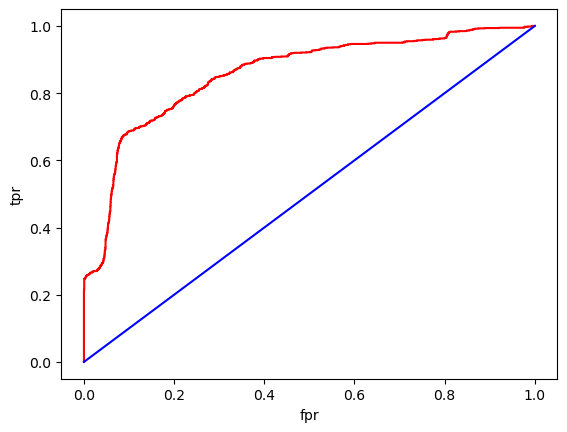

In [46]:
#Naive_Bayes
from sklearn.metrics import roc_curve
a=model.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,a)
plt.plot(fpr,tpr,color='red',label='roc')
plt.plot([0,1],[0,1],color='blue',linestyle='-')
plt.xlabel('fpr')
plt.ylabel('tpr')

Text(0, 0.5, 'tpr')

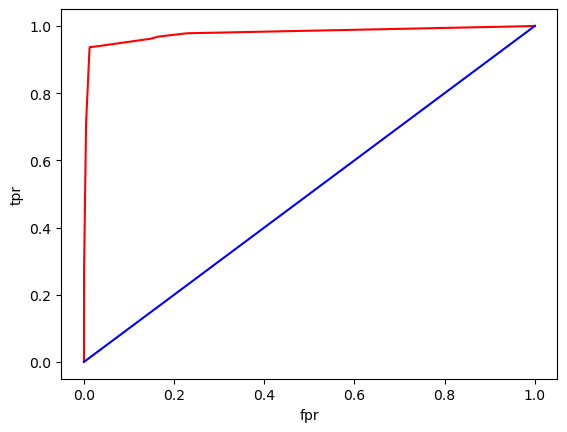

In [47]:
# Decision_Tree
from sklearn.metrics import roc_curve
a=model1.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,a)
plt.plot(fpr,tpr,color='red',label='roc')
plt.plot([0,1],[0,1],color='blue',linestyle='-')
plt.xlabel('fpr')
plt.ylabel('tpr')


# Choose the best model for the HR department to decide to retain employees.

Conclusion:- Naive_Bayes is the best model for the HR department to decide to retain employess.